# **Data Loading**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_x = pd.read_csv("/content/test.csv")
test_x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df = pd.read_csv("/content/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Data Pre-processing**

## **Extracting info from names**

In [4]:
train_test_data = [df,test_x] # combining datasets

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.unique(df['Title'])

df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [5]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)

# Dropping unnecessary features from the dataset.
df.drop('Name', axis=1, inplace=True)
test_x.drop('Name', axis=1, inplace=True)

df

# https://www.grammarly.com/blog/ms-mrs-miss-difference/ (Reason for giving 3 different mappings to Miss, Mrs and Ms)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0


## **Checking for and Dealing with null values**

### **Training Set**

In [6]:
df.isnull().values.any()

True

In [7]:
# To find which columns have NaN values.
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Title          False
dtype: bool

In [8]:
# To find the rows containing NaN Values in the Age column.
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,male,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,female,NaN,0,0,2649,7.2250,NaN,C,2
26,27,0,3,male,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,female,NaN,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0,0,2629,7.2292,NaN,C,0
863,864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S,1
868,869,0,3,male,NaN,0,0,345777,9.5000,NaN,S,0
878,879,0,3,male,NaN,0,0,349217,7.8958,NaN,S,0


In [9]:
# To find the rows containing NaN Values in the Cabin column.
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
885,886,0,3,female,39.0,0,5,382652,29.1250,NaN,Q,2
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,3
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1


In [10]:
# To find the rows containing NaN Values in the Embarked column.
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,female,38.0,0,0,113572,80.0,B28,NaN,1
829,830,1,1,female,62.0,0,0,113572,80.0,B28,NaN,2


In [11]:
# Filling missing age with median age for each Title
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"), inplace= True)

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,female,21.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0


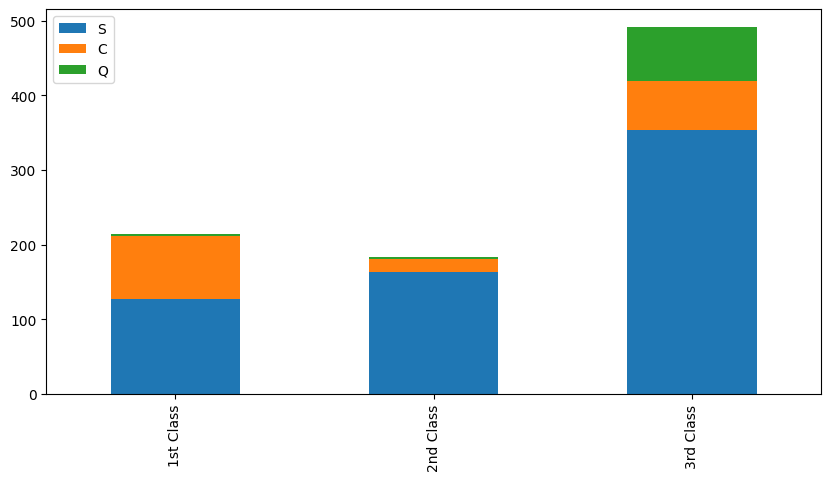

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [12]:
# Counting the number of passengers embarked from each port for each passenger class
Pclass1 = df[df['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = df[df['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = df[df['Pclass'] == 3]['Embarked'].value_counts()

# Creating a DataFrame to store the counts
dataframe = pd.DataFrame([Pclass1, Pclass2, Pclass3])
dataframe.index = ['1st Class', '2nd Class', '3rd Class']

# Plotting a stacked bar chart to visualize the counts
dataframe.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.show()

# Printing the counts for each passenger class
print("Pclass1:\n", Pclass1)
print("Pclass2:\n", Pclass2)
print("Pclass3:\n", Pclass3)

In [13]:
# Southampton had the most number of passengers for every Pclass (Ticket class).
# Filling out missing "Embarked" values with 'S' (Southampton)
df['Embarked'] = df['Embarked'].fillna('S')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,female,21.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0


In [14]:
# Dealing with Cabin NaN values.
for dataset in train_test_data:
    dataset['Cabin'] =  dataset['Cabin'].str[:1]

# Mapping and Encoding Cabin Values.
cabin_mapping = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "T": 7}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

# filling missing Cabin values with median Cabin Values for each Pclass(Ticket Class).
df["Cabin"].fillna(df.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,5.0,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,2.0,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,5.0,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,2.0,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,5.0,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,4.5,S,3
887,888,1,1,female,19.0,0,0,112053,30.0000,1.0,S,1
888,889,0,3,female,21.0,1,2,W./C. 6607,23.4500,5.0,S,1
889,890,1,1,male,26.0,0,0,111369,30.0000,2.0,C,0


### **Testing Set**

In [15]:
test_x.isnull().values.any()

True

In [16]:
# To find which columns have NaN values.
test_x.isna().any()

PassengerId    False
Pclass         False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
Title          False
dtype: bool

In [17]:
# To find the rows containing NaN Values in the Age column.
test_x[test_x['Age'].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
10,902,3,male,NaN,0,0,349220,7.8958,NaN,S,0
22,914,1,female,NaN,0,0,PC 17598,31.6833,NaN,S,2
29,921,3,male,NaN,2,0,2662,21.6792,NaN,C,0
33,925,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
36,928,3,female,NaN,0,0,342712,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,female,NaN,0,0,334915,7.7208,NaN,Q,1
410,1302,3,female,NaN,0,0,365237,7.7500,NaN,Q,1
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S,0


In [18]:
# To find the rows containing NaN Values in the Fare column.
test_x[test_x['Fare'].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,male,60.5,0,0,3701,NaN,NaN,S,0


In [19]:
# To find the rows containing NaN Values in the Cabin column.
test_x[test_x['Cabin'].isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,female,28.0,0,0,347086,7.7750,NaN,S,1
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S,0


In [20]:
# Filling missing age with median age for each Title
test_x["Age"].fillna(test_x.groupby('Title')['Age'].transform("median"), inplace= True)

# Filling missing fare with median fare for each Pclass
test_x["Fare"].fillna(test_x.groupby("Pclass")["Fare"].transform("median"), inplace=True)

# filling missing Cabin values with median Cabin Values for each Pclass(Ticket Class).
test_x["Cabin"].fillna(test_x.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

test_x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,5.0,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,5.0,S,2
2,894,2,male,62.0,0,0,240276,9.6875,5.0,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,5.0,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,5.0,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,28.5,0,0,A.5. 3236,8.0500,5.0,S,0
414,1306,1,female,39.0,0,0,PC 17758,108.9000,2.0,C,3
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,5.0,S,0
416,1308,3,male,28.5,0,0,359309,8.0500,5.0,S,0


## **Feature Drops**

In [21]:
# Dropping the Ticket Column as it seems to provide no additional value to the model.
df = df.drop('Ticket', axis = 1)
test_x = test_x.drop('Ticket', axis = 1)

# Dropping the PassengerID Column as it seems to provide no additional value to the model.
df = df.drop('PassengerId', axis = 1)
test_x = test_x.drop('PassengerId', axis = 1)

## **Encoding Categorical Variables (One-Hot Encoding)**

In [22]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'])
test_x_encoded = pd.get_dummies(test_x, columns=['Sex', 'Embarked'])
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,5.0,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,2.0,2,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,5.0,1,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,2.0,2,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,5.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,4.5,3,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1.0,1,1,0,0,0,1
888,0,3,21.0,1,2,23.4500,5.0,1,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,2.0,0,0,1,1,0,0


# **Normalisation**

In [23]:
df_norm = (df_encoded - df_encoded.min()) / (df_encoded.max() - df_encoded.min())
test_x_norm = (test_x_encoded - test_x_encoded.min()) / (test_x_encoded.max() - test_x_encoded.min())

df_norm

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,0.714286,0.000000,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.285714,0.666667,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.714286,0.333333,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,0.285714,0.666667,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,0.714286,0.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,0.642857,1.000000,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,0.142857,0.333333,1.0,0.0,0.0,0.0,1.0
888,0.0,1.0,0.258608,0.125,0.333333,0.045771,0.714286,0.333333,1.0,0.0,0.0,0.0,1.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.285714,0.000000,0.0,1.0,1.0,0.0,0.0


# **Data Splitting**

In [24]:
# Setting a random seed for reproducibility
np.random.seed(42)

# Shuffling the data
df_norm = df_norm.sample(frac=1).reset_index(drop=True)

feature_columns = ['Pclass',	'Age',	'SibSp',	'Parch',	'Fare', 'Cabin',	'Title',	'Sex_female',	'Sex_male',	'Embarked_C',	'Embarked_Q',	'Embarked_S']
output_column = 'Survived'

# Splitting the data into training and testing sets
train_ratio = 0.80  # Percentage of data to use for training
train_size = int(train_ratio * len(df_norm))

x_train_n = df_norm.loc[:train_size, feature_columns].values         # Features for training
y_train_n = df_norm.loc[:train_size, output_column].values           # Output for training

x_test_n = df_norm.loc[train_size:, feature_columns].values          # Features for testing
y_test_n = df_norm.loc[train_size:, output_column].values            # Output for testing


# .values (for numpy arrays) 
# Printing the training and testing sets
print("Training set:")
print("X_train:\n", x_train_n)
print("Y_train:\n", y_train_n)

print("\nTesting set:")
print("X_test:\n", x_test_n)
print("Y_test:\n", y_test_n)

Training set:
X_train:
 [[1.         0.10781603 0.125      ... 1.         0.         0.        ]
 [0.5        0.3842674  0.         ... 0.         0.         1.        ]
 [1.         0.24604172 0.         ... 0.         0.         1.        ]
 ...
 [1.         0.01985423 0.5        ... 0.         0.         1.        ]
 [1.         0.         0.         ... 1.         0.         0.        ]
 [0.5        0.32143755 0.         ... 0.         0.         1.        ]]
Y_train:
 [1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1

# **Model Fitting**

## **K-Nearest Neighbours**

In [25]:
def knn(x_train, y_train, x_test, k):

    # Getting the number of training samples and test samples
    num_train = x_train.shape[0]
    num_test = x_test.shape[0]

    # Calculating Euclidean distances between training samples and test samples
    distances = np.sqrt(np.sum((x_train[:, np.newaxis] - x_test) ** 2, axis=2))

    # Finding the indices of the k nearest neighbors for each test sample
    nearest_indices = np.argsort(distances, axis=0)[:k]

    # Getting the labels of the k nearest neighbors
    nearest_labels = y_train[nearest_indices]

    # Creating an array to store the predicted labels
    y_pred = np.zeros(num_test)

    # Predicting the label with the majority vote for each test sample
    for i in range(num_test):
        unique_labels, label_counts = np.unique(nearest_labels[:, i], return_counts=True)
        y_pred[i] = unique_labels[np.argmax(label_counts)]

    return y_pred

In [26]:
def accuracy_score(y_true, y_pred):
    # Converting inputs to NumPy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculating the accuracy score
    accuracy = np.mean(y_true == y_pred)  
    # As this returns a boolean array where True is treated as 1 and False as 0,
    # when calculating the mean, this gives us the accuracy.

    return accuracy

In [27]:
k = 8 # Let k = 08 as after testing values from 7-15, 8 seems to give the highest accuracy

y_pred_n = knn(x_train_n, y_train_n, x_test_n, k)
y_pred_n

array([0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1.])

In [28]:
accuracy = accuracy_score(y_test_n, y_pred_n)
print("Accuracy:", accuracy*100, "%")

Accuracy: 85.47486033519553 %


## **Naive-Bayes**

In [29]:
def naive_bayes(x_train, y_train, x_test):
    # Converting the input data to pandas DataFrame for easier manipulation
    x_train = pd.DataFrame(x_train)
    y_train = pd.DataFrame(y_train)
    x_test = pd.DataFrame(x_test)

    # Getting the number of samples and features
    num_samples, num_features = x_train.shape

    # Getting the unique classes and their counts
    classes, class_counts = np.unique(y_train, return_counts=True)

    # Computing the prior probabilities
    prior_probs = class_counts / num_samples

    # Creating empty dictionaries to store the mean and variance for each feature and class
    mean_dict = {}
    var_dict = {}

    # Calculatig the mean and variance for each feature and class
    for cls in classes:
        x_cls = x_train[y_train.iloc[:, 0] == cls]

        # Computing the mean and variance for each feature
        mean_dict[cls] = np.mean(x_cls, axis=0)
        var_dict[cls] = np.var(x_cls, axis=0)

    # Predicting the output for each sample in x_test
    predictions = []

    for i in range(x_test.shape[0]):
        sample = x_test.iloc[i, :]
        probs = []

        # Calculating the posterior probability for each class
        for cls in classes:
            cls_idx = np.where(classes == cls)[0][0]  # Find the index of the class in classes array
            prior_prob = prior_probs[cls_idx]

            # Calculating the likelihood using Gaussian distribution
            likelihood = np.exp(-((sample - mean_dict[cls]) ** 2) / (2 * var_dict[cls])) / np.sqrt(2 * np.pi * var_dict[cls])

            # Computing the joint probability
            joint_prob = np.prod(likelihood)

            # Calculating the posterior probability
            posterior_prob = prior_prob * joint_prob
            probs.append(posterior_prob)

        # Assigning the class with the highest posterior probability
        predicted_class = np.argmax(probs)
        predictions.append(predicted_class)

    # Converting the predictions to a NumPy array
    predictions = np.array(predictions)

    return predictions


In [30]:
y_pred_n = naive_bayes(x_train_n, y_train_n, x_test_n)

accuracy = accuracy_score(y_test_n, y_pred_n)
print("Accuracy:", accuracy*100, "%")

Accuracy: 78.77094972067039 %
